In [1]:
import os, sys
cwd = os.getcwd()
module_path = os.path.abspath(os.path.join('..'))
student_life_path = module_path + "/student_life"
physnet_path = module_path + "/Physionet_rev"
print(student_life_path)
print(physnet_path)

sys.path.append(physnet_path)
sys.path.append(student_life_path)

import pandas as pd
import numpy as np
import pickle
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd

import evaluate_plot as eval_plot
import batchify as batchify
import net_dbm as dbm
from net_dbm import RNN_osaka
from sklearn.metrics import precision_recall_fscore_support
import importlib
import src.utils.student_utils as student_utils
import src.definitions as definitions
from IPython.display import display
from src.data_getter import student_life_var_binned_data_getter
importlib.reload(student_life_var_binned_data_getter)
importlib.reload(student_utils)

# 1 starts the process on GPU-0
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
torch.__version__
%matplotlib inline
print(eval_plot)
print(dbm)
print(sys.version_info)

/Users/nsimsiri/Documents/code/ml/MultiRes/student_life
/Users/nsimsiri/Documents/code/ml/MultiRes/Physionet_rev
<module 'evaluate_plot' from '/Users/nsimsiri/Documents/code/ml/MultiRes/Physionet_rev/evaluate_plot.py'>
<module 'net_dbm' from '/Users/nsimsiri/Documents/code/ml/MultiRes/Physionet_rev/net_dbm.py'>
sys.version_info(major=3, minor=6, micro=0, releaselevel='final', serial=0)


In [2]:
data = None
pickle_path = student_life_path + '/data/training_data/student_life_pickle.pkl'
model_path = student_life_path + '/models'
print('pickle_path', pickle_path)
print('model_config_path', model_path)

pickle_path /Users/nsimsiri/Documents/code/ml/MultiRes/student_life/data/training_data/student_life_pickle.pkl
model_config_path /Users/nsimsiri/Documents/code/ml/MultiRes/student_life/models


In [3]:
with open(pickle_path, 'rb') as pickle_file:
    data = pickle.load(pickle_file)
print(data.keys())

dict_keys(['train_ids', 'val_ids', 'test_ids', 'data'])


In [4]:
params = {'bilstm_flag':True,
        'hidden_dim' : 32,
        'dropout' : 0.9,
        'layers' : 1,
        'tagset_size' : 5,
        'bilstm_flag' : True,
        'attn_category' : 'dot',
        'num_features' : 10,
        'imputation_layer_dim_op':2,
        'selected_feats' : 0,
        'batch_size':1,
        'same_device':True,
        'same_feat_other_device':False,
        'model_name':'DBM-SL'}

model_config_path = model_path + "/" + params['model_name']+'.pt'
print(model_config_path)
with open(model_config_path, 'wb') as config_file:
    pickle.dump(params, config_file)


/Users/nsimsiri/Documents/code/ml/MultiRes/student_life/models/DBM-SL.pt


In [5]:
model_RNN = dbm.RNN_osaka(params)
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model_RNN.parameters(), lr=0.0001, weight_decay=0.000000002)


Dot Attention is being used!


/Users/nsimsiri/anaconda2/envs/python3/lib/python3.6/site-packages/torch/nn/modules/rnn.py:46: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.9 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [6]:
mode = 'normal'
if(mode=='normal'):
    feature_ind = 0
    label_ind = -1
    print("NORMAL mode with Flags")

NORMAL mode with Flags


In [7]:
batch_size = 1
epochs = 45
save_flag = True
dict_df_prf_mod = {}
print("==x=="*20)
print("Data Statistics")
print("Train Data: "+str(len(data['train_ids'])))
print("Val Data: "+str(len(data['val_ids'])))
print("Test Data: "+str(len(data['test_ids'])))
print("==x=="*20)

==x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x==
Data Statistics
Train Data: 17
Val Data: 5
Test Data: 7
==x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x==


In [8]:
print(data['data'].keys())


dict_keys(['35_3_29', '35_3_30', '35_3_31', '35_4_2', '35_4_3', '35_4_4', '35_4_5', '35_4_6', '35_4_9', '35_4_10', '35_4_11', '35_4_12', '35_4_13', '35_4_14', '35_4_15', '35_4_16', '35_4_18', '35_4_20', '35_4_21', '35_4_23', '35_4_29', '35_4_30', '35_5_2', '35_5_7', '35_5_8', '35_5_12', '35_5_19', '35_5_21', '35_5_22'])


  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=0=#==#==#==#==#=


100%|██████████| 17/17 [00:22<00:00,  1.48s/it]
/Users/nsimsiri/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nsimsiri/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


==========Epoch No:0==========
Training Loss: 27.119651436805725
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




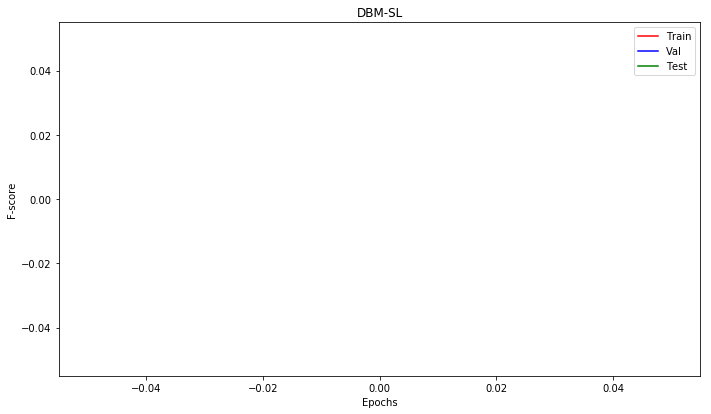

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=1=#==#==#==#==#=


100%|██████████| 17/17 [00:22<00:00,  1.35s/it]


==========Epoch No:1==========
Training Loss: 27.04112422466278
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




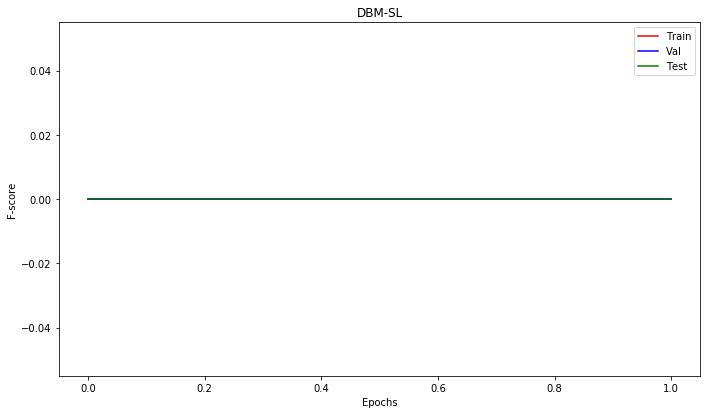

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=2=#==#==#==#==#=


100%|██████████| 17/17 [00:27<00:00,  2.27s/it]


==========Epoch No:2==========
Training Loss: 26.96210515499115
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




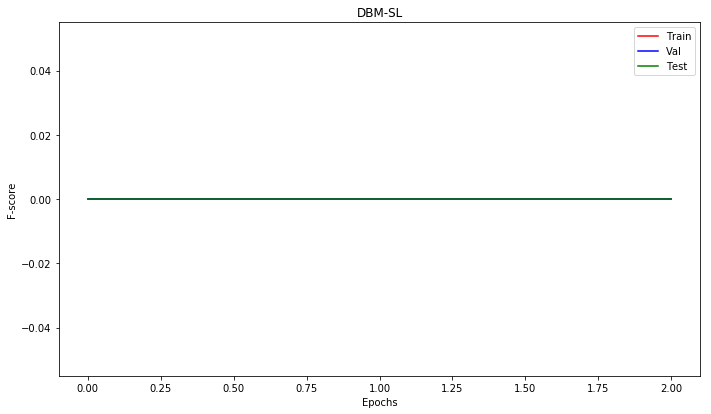

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=3=#==#==#==#==#=


100%|██████████| 17/17 [00:28<00:00,  1.69s/it]


==========Epoch No:3==========
Training Loss: 26.887093544006348
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




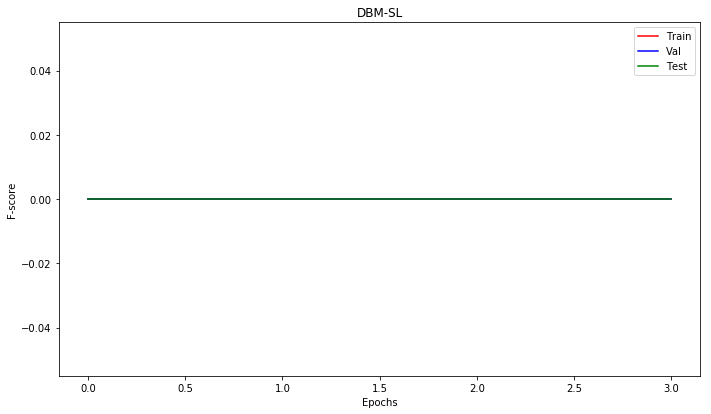

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=4=#==#==#==#==#=


100%|██████████| 17/17 [00:24<00:00,  1.68s/it]


==========Epoch No:4==========
Training Loss: 26.811988413333893
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




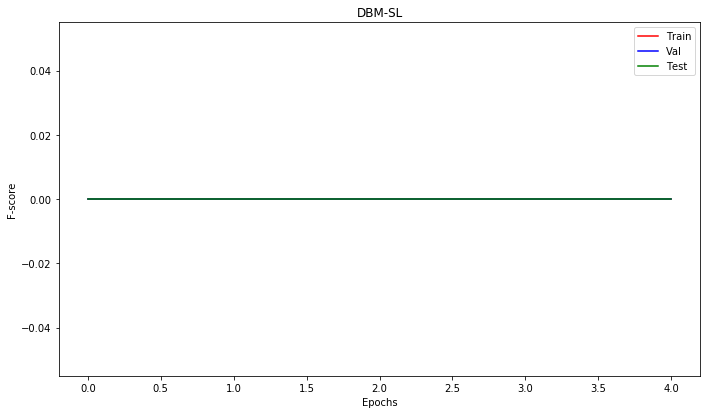

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=5=#==#==#==#==#=


100%|██████████| 17/17 [00:24<00:00,  1.34s/it]


==========Epoch No:5==========
Training Loss: 26.742028892040253
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




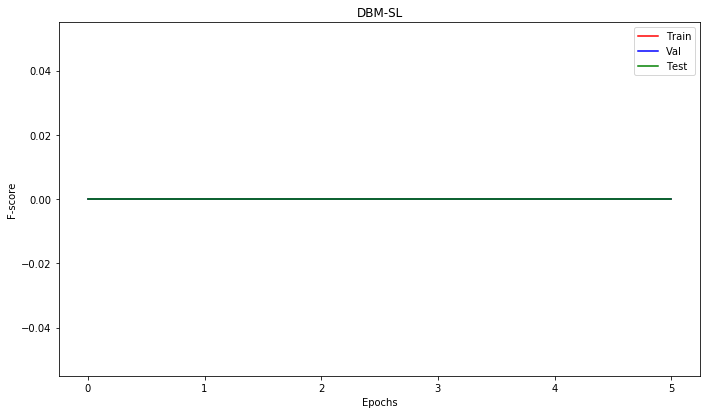

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=6=#==#==#==#==#=


100%|██████████| 17/17 [00:23<00:00,  1.38s/it]


==========Epoch No:6==========
Training Loss: 26.673420071601868
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




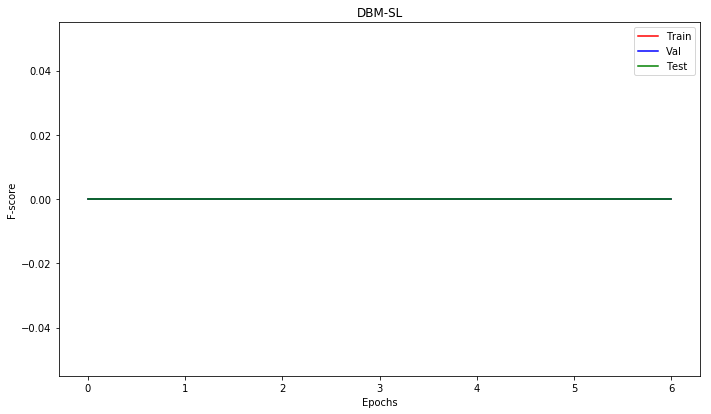

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=7=#==#==#==#==#=


100%|██████████| 17/17 [00:41<00:00,  2.39s/it]


==========Epoch No:7==========
Training Loss: 26.61064624786377
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




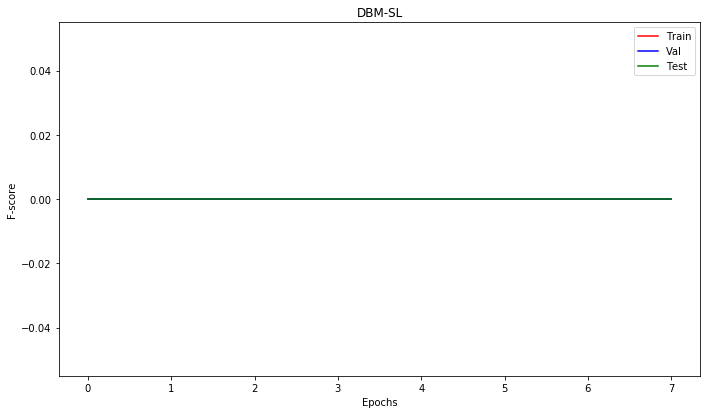

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=8=#==#==#==#==#=


100%|██████████| 17/17 [00:26<00:00,  1.50s/it]


==========Epoch No:8==========
Training Loss: 26.552151143550873
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




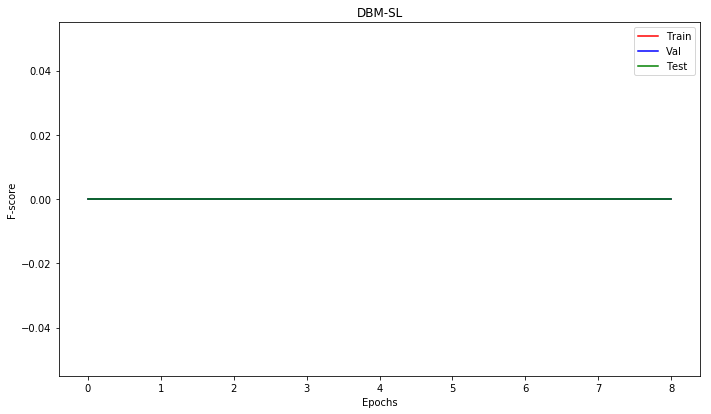

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=9=#==#==#==#==#=


100%|██████████| 17/17 [00:48<00:00,  2.28s/it]


==========Epoch No:9==========
Training Loss: 26.493978202342987
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




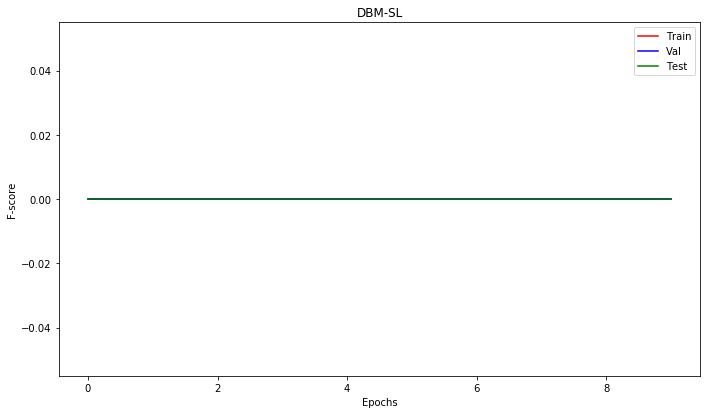

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=10=#==#==#==#==#=


100%|██████████| 17/17 [00:33<00:00,  2.43s/it]


==========Epoch No:10==========
Training Loss: 26.433612048625946
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




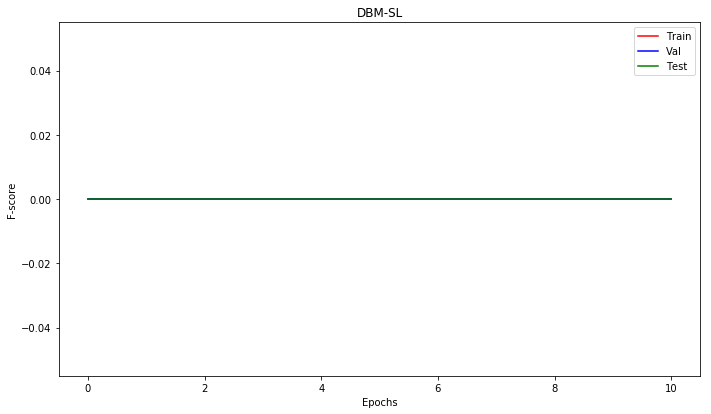

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=11=#==#==#==#==#=


100%|██████████| 17/17 [00:26<00:00,  1.47s/it]


==========Epoch No:11==========
Training Loss: 26.365146100521088
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




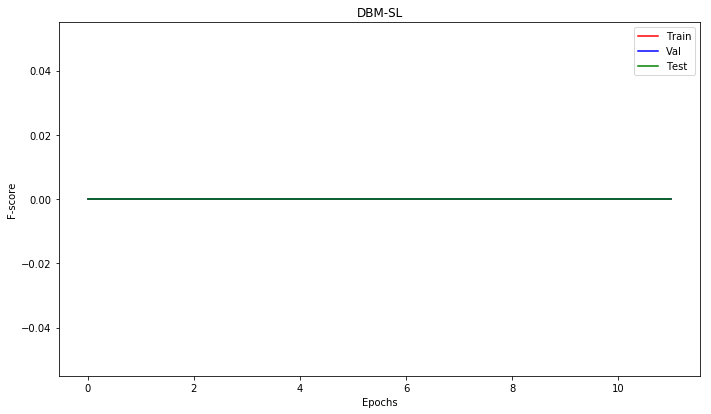

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=12=#==#==#==#==#=


100%|██████████| 17/17 [00:29<00:00,  1.69s/it]


==========Epoch No:12==========
Training Loss: 26.29211175441742
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




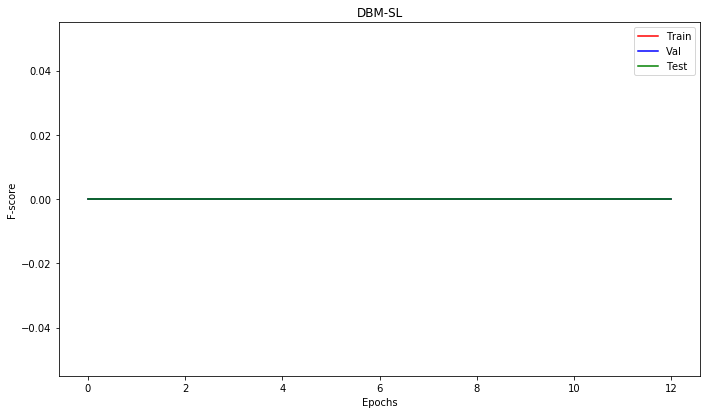

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=13=#==#==#==#==#=


100%|██████████| 17/17 [00:36<00:00,  2.32s/it]


==========Epoch No:13==========
Training Loss: 26.226535856723785
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




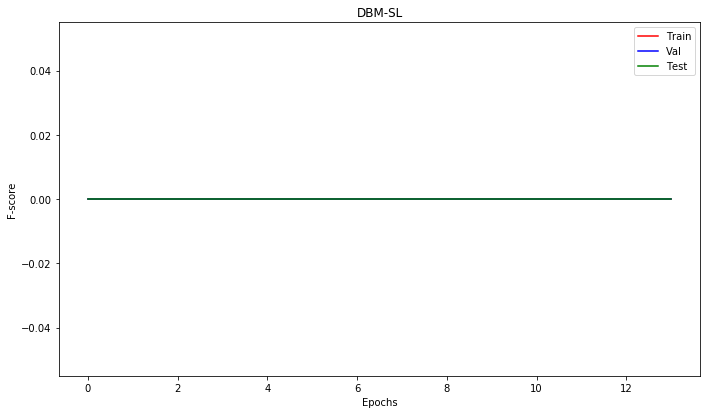

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=14=#==#==#==#==#=


100%|██████████| 17/17 [00:30<00:00,  1.94s/it]


==========Epoch No:14==========
Training Loss: 26.163459956645966
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




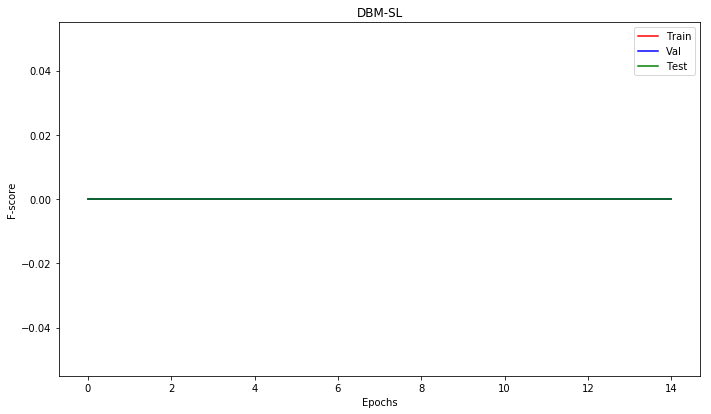

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=15=#==#==#==#==#=


100%|██████████| 17/17 [00:28<00:00,  1.70s/it]


==========Epoch No:15==========
Training Loss: 26.108835756778717
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




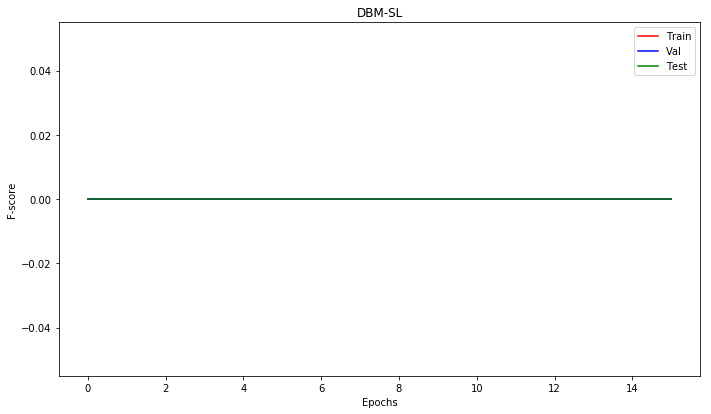

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=16=#==#==#==#==#=


100%|██████████| 17/17 [00:32<00:00,  1.98s/it]


==========Epoch No:16==========
Training Loss: 26.06045663356781
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




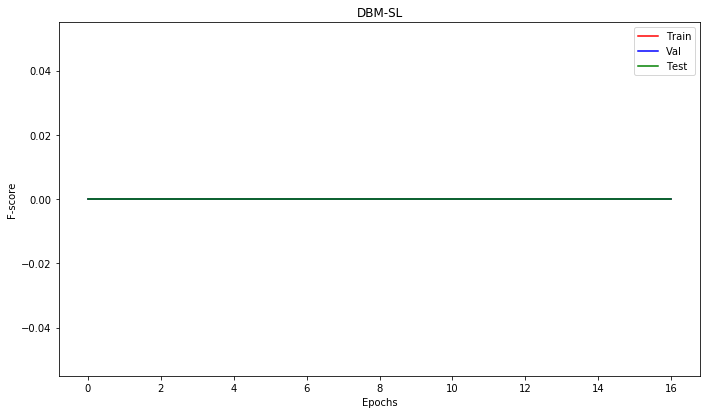

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=17=#==#==#==#==#=


100%|██████████| 17/17 [00:46<00:00,  2.21s/it]


==========Epoch No:17==========
Training Loss: 26.015541791915894
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




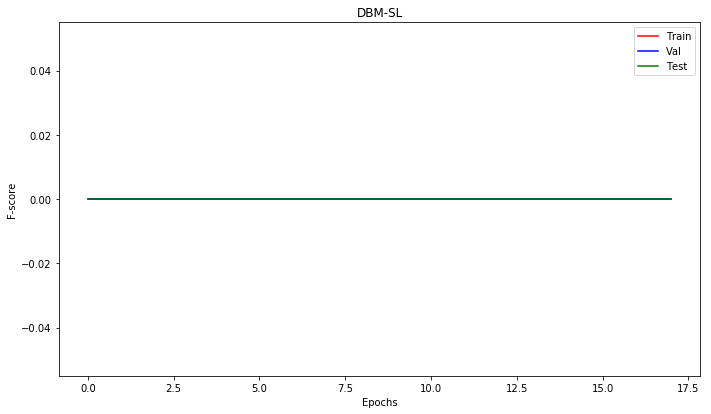

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=18=#==#==#==#==#=


100%|██████████| 17/17 [00:31<00:00,  1.81s/it]


==========Epoch No:18==========
Training Loss: 25.949130475521088
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




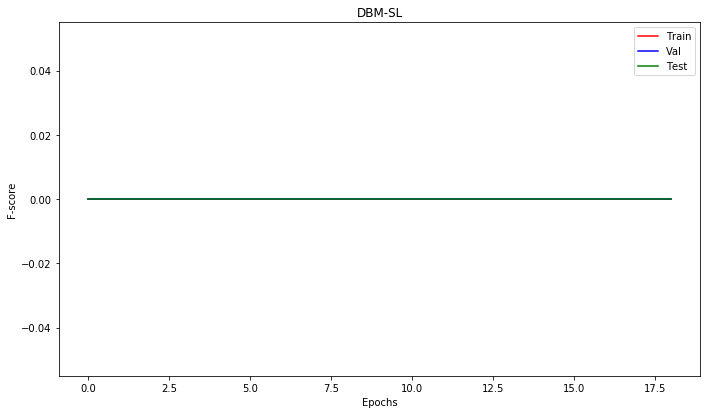

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=19=#==#==#==#==#=


100%|██████████| 17/17 [00:29<00:00,  1.80s/it]


==========Epoch No:19==========
Training Loss: 25.91009360551834
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




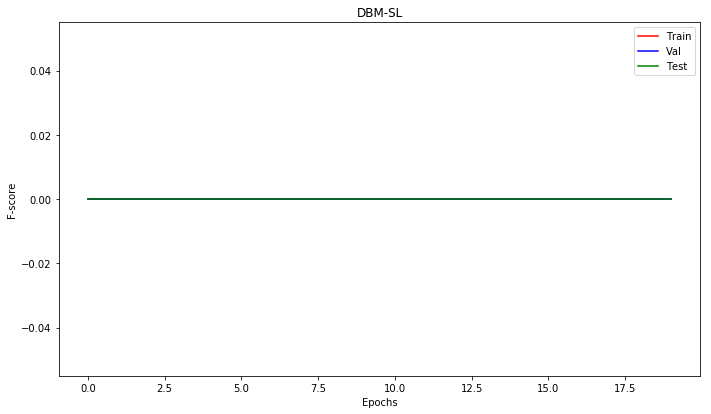

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=20=#==#==#==#==#=


100%|██████████| 17/17 [00:32<00:00,  1.77s/it]


==========Epoch No:20==========
Training Loss: 25.871813595294952
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




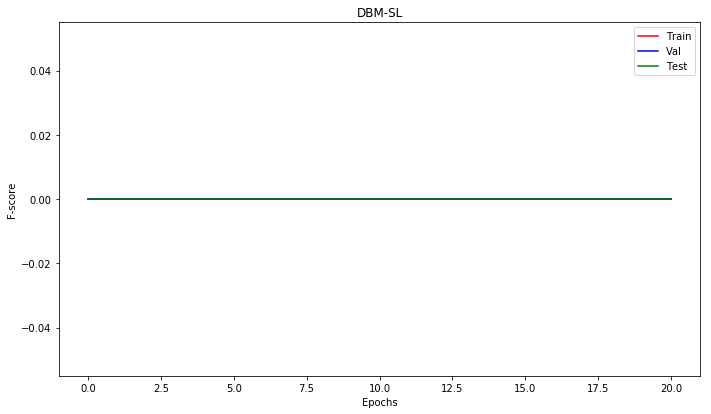

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=21=#==#==#==#==#=


100%|██████████| 17/17 [00:42<00:00,  2.07s/it]


==========Epoch No:21==========
Training Loss: 25.833864390850067
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




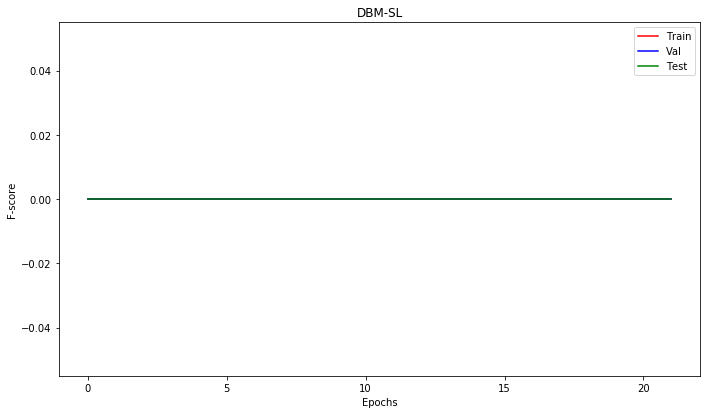

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=22=#==#==#==#==#=


100%|██████████| 17/17 [00:32<00:00,  1.90s/it]


==========Epoch No:22==========
Training Loss: 25.795448303222656
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




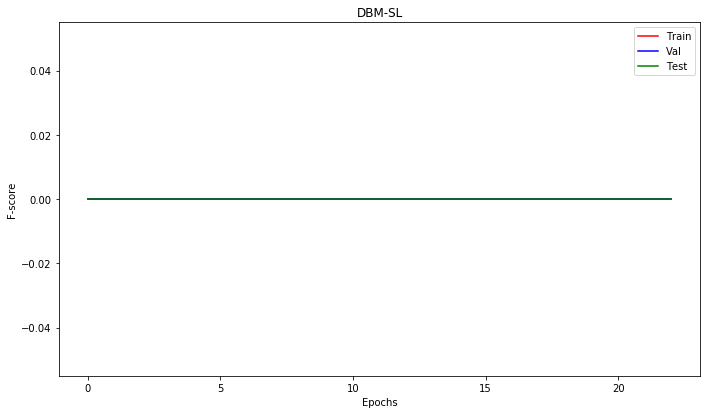

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=23=#==#==#==#==#=


100%|██████████| 17/17 [00:31<00:00,  1.85s/it]


==========Epoch No:23==========
Training Loss: 25.755653500556946
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




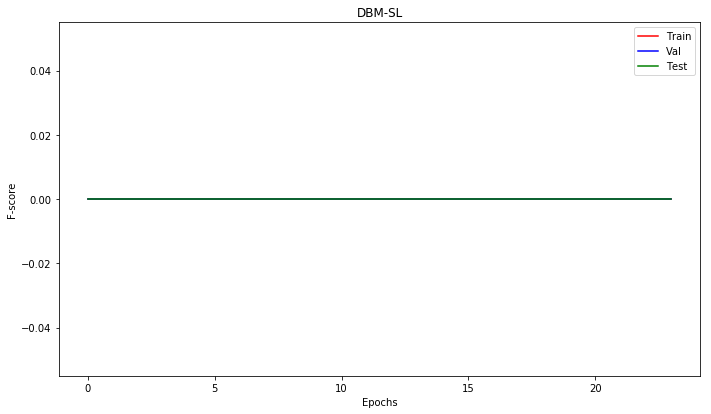

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=24=#==#==#==#==#=


100%|██████████| 17/17 [00:38<00:00,  1.85s/it]


==========Epoch No:24==========
Training Loss: 25.712319910526276
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




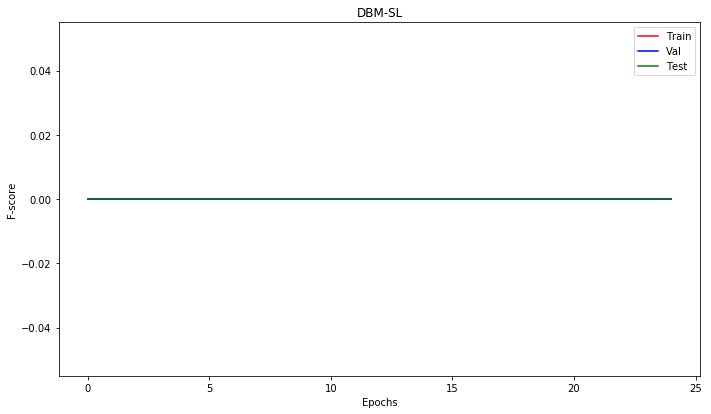

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=25=#==#==#==#==#=


100%|██████████| 17/17 [00:29<00:00,  1.75s/it]


==========Epoch No:25==========
Training Loss: 25.669991493225098
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




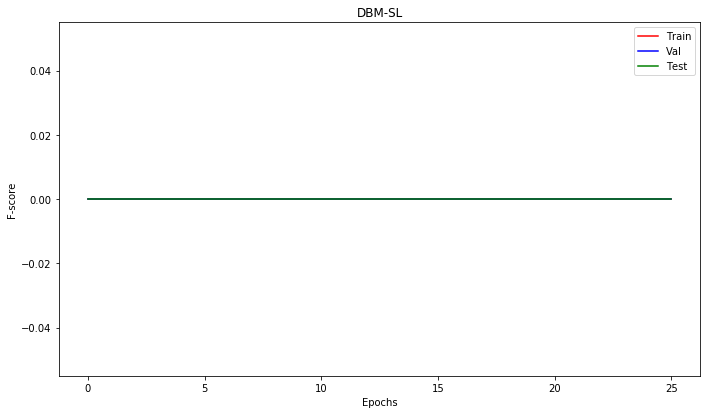

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=26=#==#==#==#==#=


100%|██████████| 17/17 [00:31<00:00,  1.76s/it]


==========Epoch No:26==========
Training Loss: 25.630088329315186
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




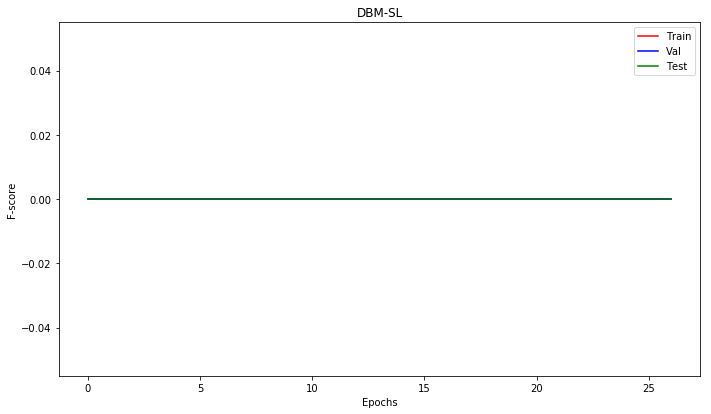

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=27=#==#==#==#==#=


100%|██████████| 17/17 [00:38<00:00,  2.26s/it]


==========Epoch No:27==========
Training Loss: 25.590901911258698
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




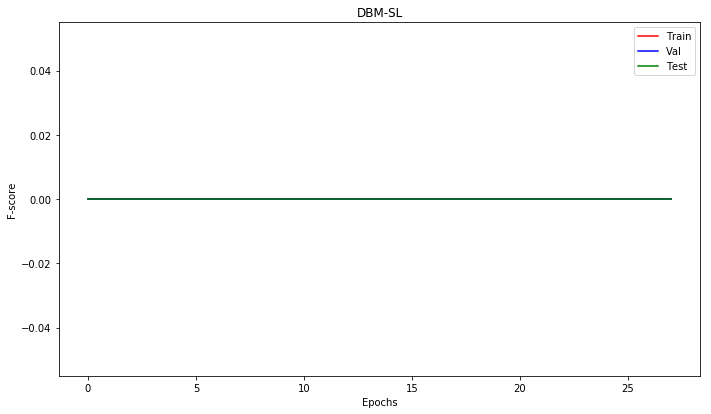

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=28=#==#==#==#==#=


100%|██████████| 17/17 [00:32<00:00,  1.98s/it]


==========Epoch No:28==========
Training Loss: 25.55669629573822
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




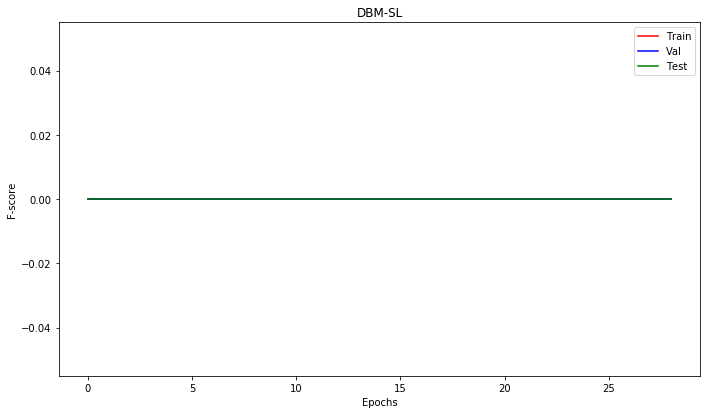

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=29=#==#==#==#==#=


100%|██████████| 17/17 [00:32<00:00,  1.98s/it]


==========Epoch No:29==========
Training Loss: 25.523861825466156
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




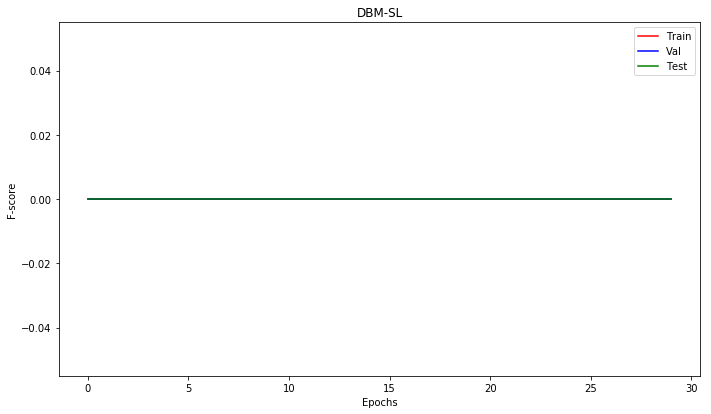

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=30=#==#==#==#==#=


100%|██████████| 17/17 [00:32<00:00,  1.89s/it]


==========Epoch No:30==========
Training Loss: 25.491371750831604
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




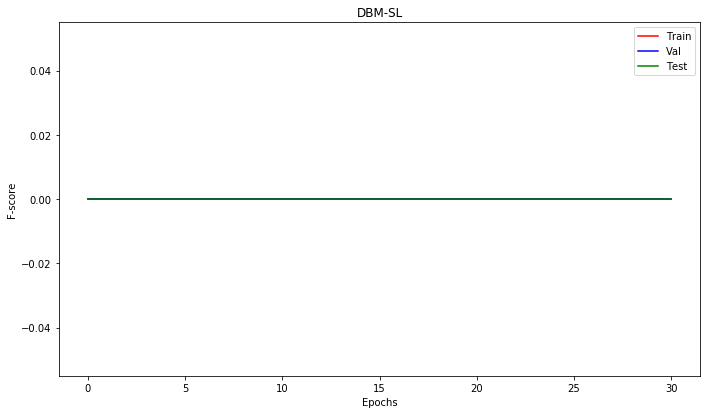

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=31=#==#==#==#==#=


100%|██████████| 17/17 [00:32<00:00,  1.83s/it]


==========Epoch No:31==========
Training Loss: 25.459228932857513
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




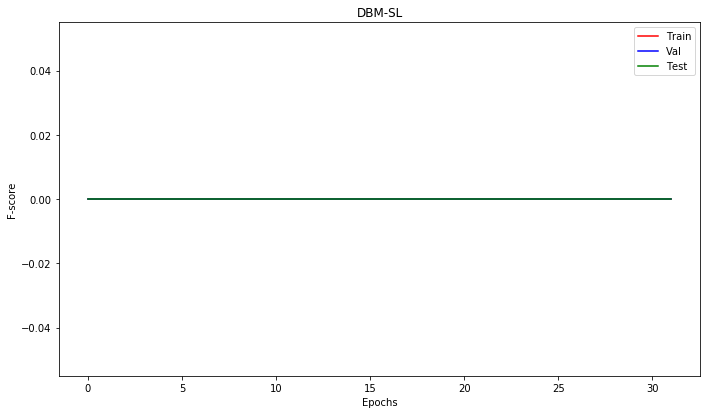

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=32=#==#==#==#==#=


100%|██████████| 17/17 [00:32<00:00,  1.93s/it]


==========Epoch No:32==========
Training Loss: 25.425521790981293
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




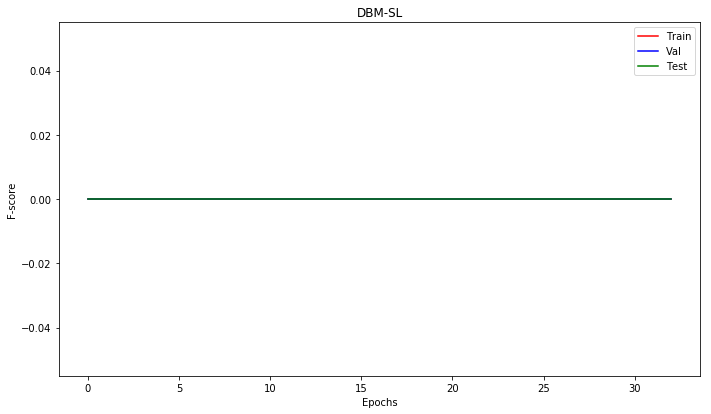

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=33=#==#==#==#==#=


100%|██████████| 17/17 [00:31<00:00,  1.83s/it]


==========Epoch No:33==========
Training Loss: 25.392211616039276
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




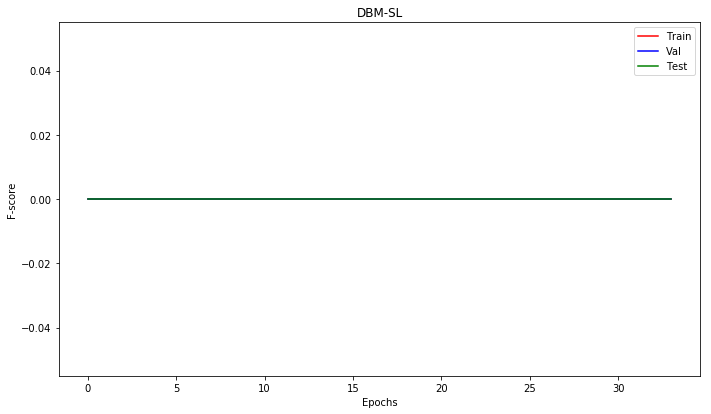

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=34=#==#==#==#==#=


100%|██████████| 17/17 [00:34<00:00,  1.92s/it]


==========Epoch No:34==========
Training Loss: 25.358312845230103
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




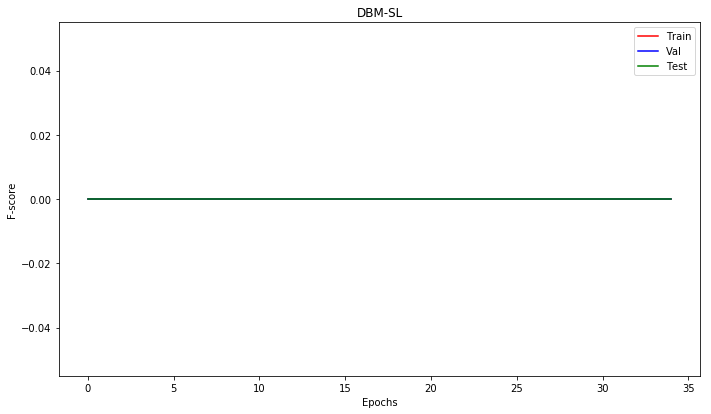

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=35=#==#==#==#==#=


100%|██████████| 17/17 [00:37<00:00,  2.17s/it]


==========Epoch No:35==========
Training Loss: 25.324878334999084
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




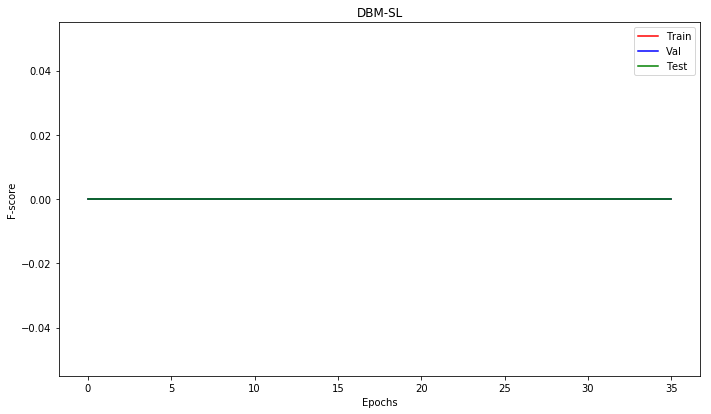

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=36=#==#==#==#==#=


100%|██████████| 17/17 [00:49<00:00,  4.75s/it]


==========Epoch No:36==========
Training Loss: 25.292270004749298
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




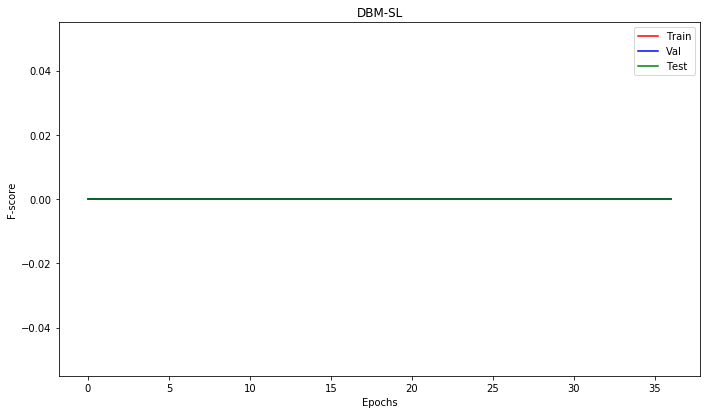

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=37=#==#==#==#==#=


100%|██████████| 17/17 [00:32<00:00,  1.86s/it]


==========Epoch No:37==========
Training Loss: 25.264555633068085
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




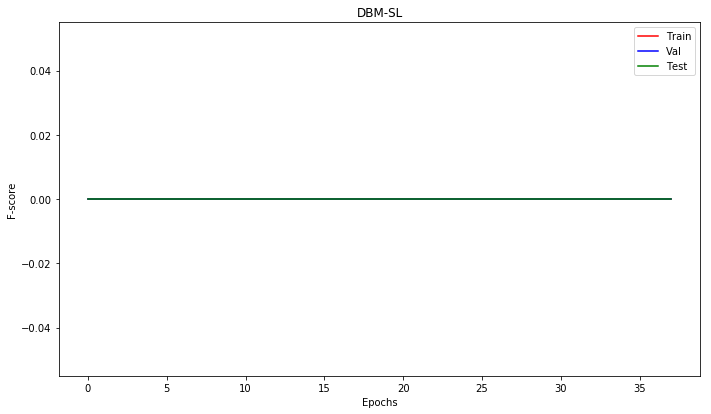

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=38=#==#==#==#==#=


100%|██████████| 17/17 [00:34<00:00,  2.04s/it]


==========Epoch No:38==========
Training Loss: 25.235428273677826
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




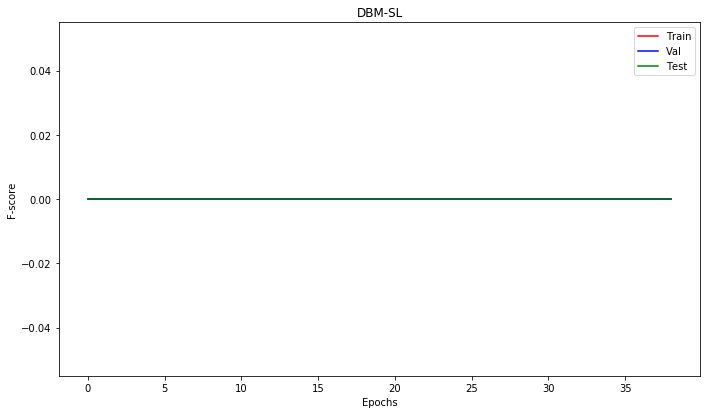

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=39=#==#==#==#==#=


100%|██████████| 17/17 [00:32<00:00,  1.86s/it]


==========Epoch No:39==========
Training Loss: 25.2080939412117
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




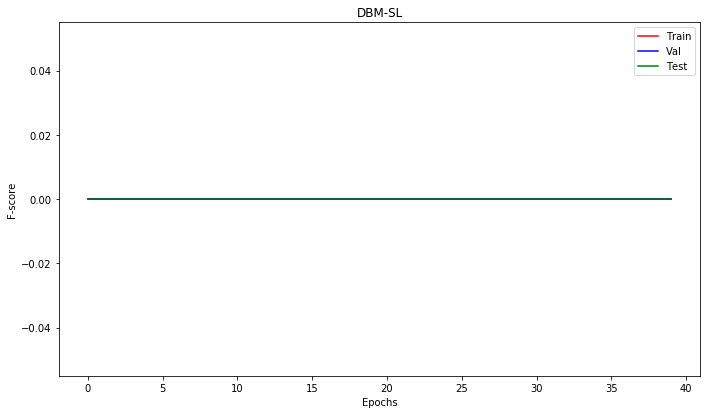

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=40=#==#==#==#==#=


100%|██████████| 17/17 [00:32<00:00,  1.97s/it]


==========Epoch No:40==========
Training Loss: 25.18321865797043
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




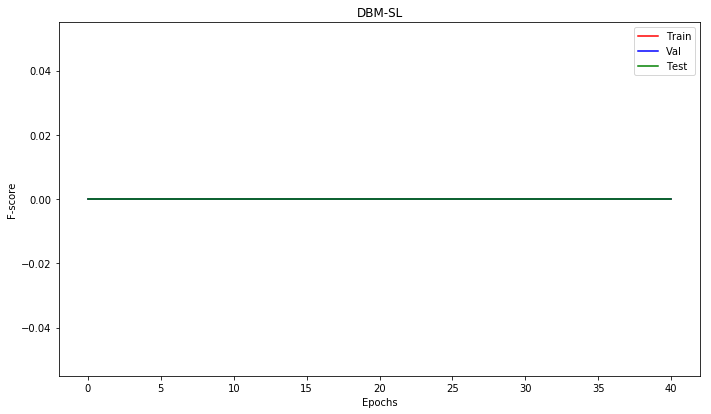

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=41=#==#==#==#==#=


100%|██████████| 17/17 [00:34<00:00,  1.97s/it]


==========Epoch No:41==========
Training Loss: 25.1595059633255
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




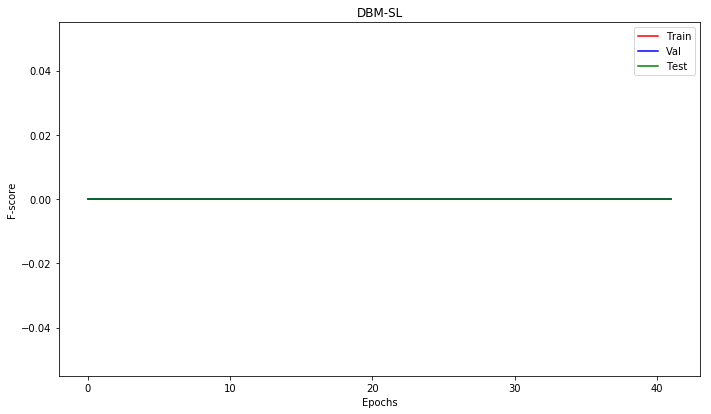

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=42=#==#==#==#==#=


100%|██████████| 17/17 [00:32<00:00,  1.87s/it]


==========Epoch No:42==========
Training Loss: 25.13612949848175
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




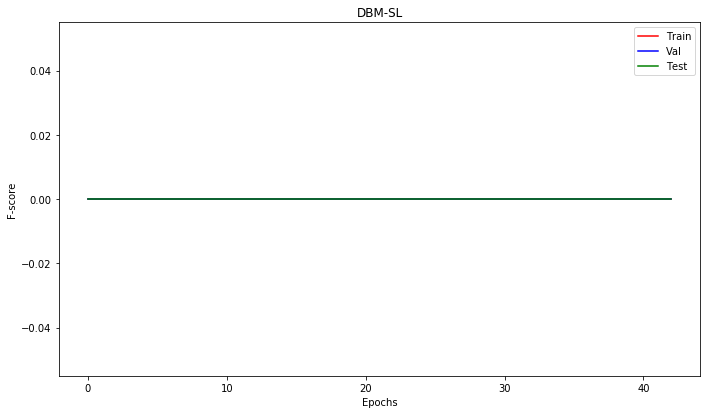

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=43=#==#==#==#==#=


100%|██████████| 17/17 [00:23<00:00,  1.32s/it]


==========Epoch No:43==========
Training Loss: 25.113160014152527
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




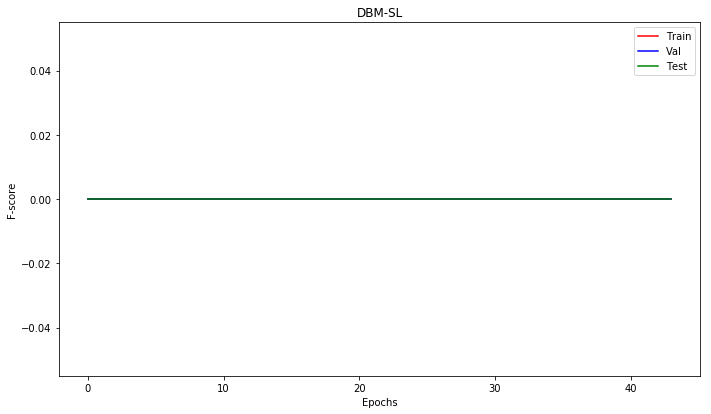

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=44=#==#==#==#==#=


100%|██████████| 17/17 [00:23<00:00,  1.41s/it]


==========Epoch No:44==========
Training Loss: 25.090548753738403
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.42857142857142855, 0.42857142857142855, 0.42857142857142855, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




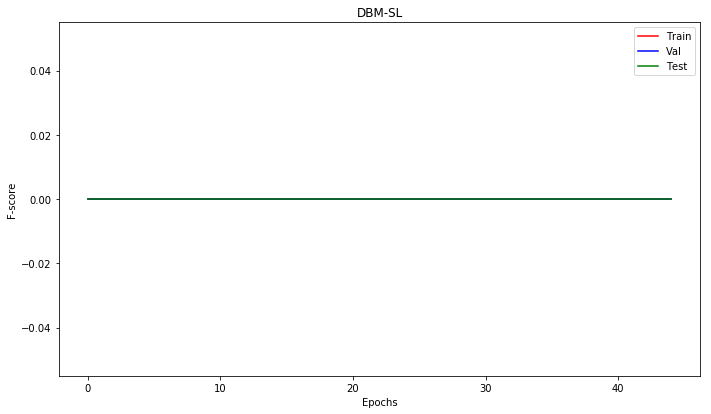

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=45=#==#==#==#==#=


100%|██████████| 17/17 [00:24<00:00,  1.51s/it]


==========Epoch No:45==========
Training Loss: 25.06786072254181
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




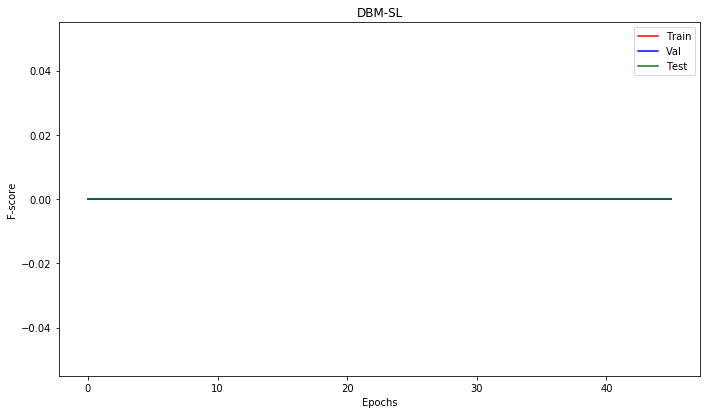

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=46=#==#==#==#==#=


100%|██████████| 17/17 [00:23<00:00,  1.38s/it]


==========Epoch No:46==========
Training Loss: 25.045305013656616
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




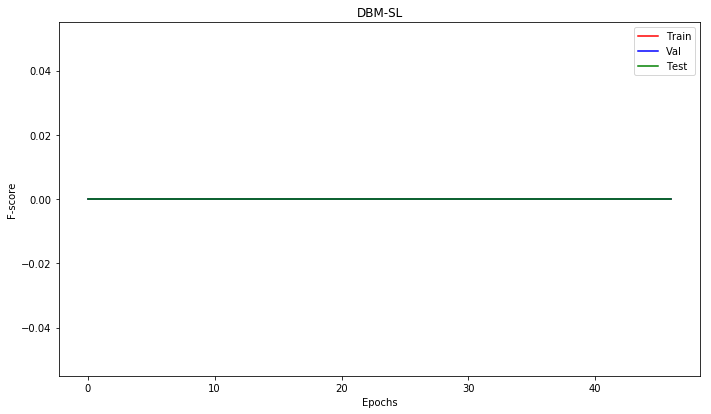

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=47=#==#==#==#==#=


100%|██████████| 17/17 [00:22<00:00,  1.33s/it]


==========Epoch No:47==========
Training Loss: 25.022808074951172
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




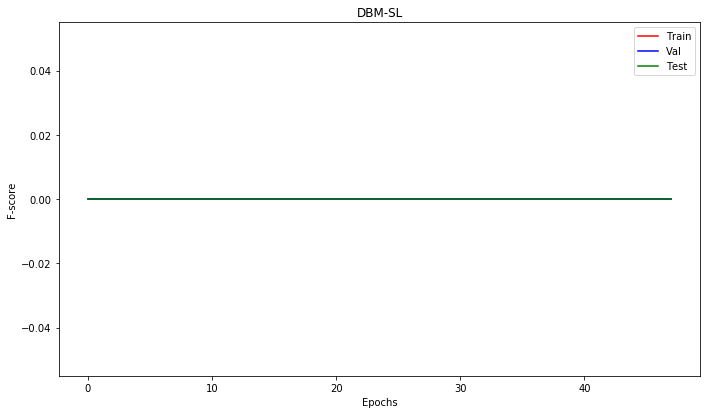

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=48=#==#==#==#==#=


100%|██████████| 17/17 [00:22<00:00,  1.33s/it]


==========Epoch No:48==========
Training Loss: 25.000011920928955
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




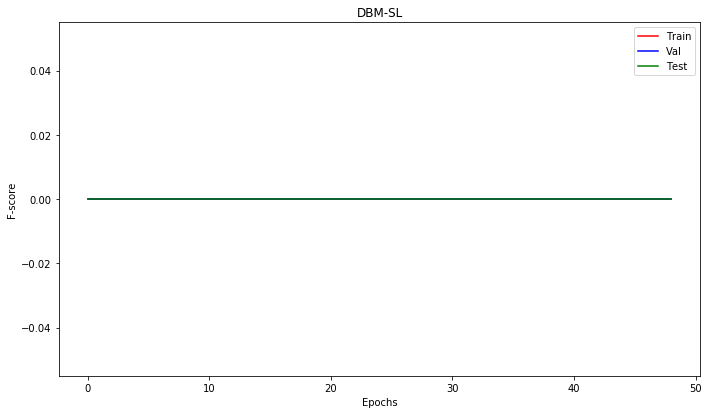

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=49=#==#==#==#==#=


100%|██████████| 17/17 [00:22<00:00,  1.37s/it]


==========Epoch No:49==========
Training Loss: 24.97763442993164
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




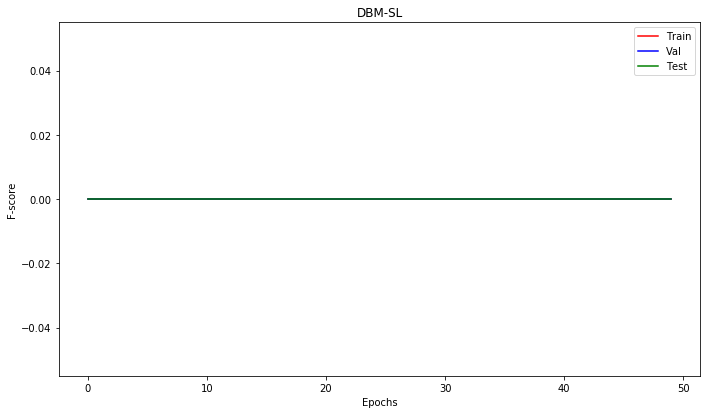

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=50=#==#==#==#==#=


100%|██████████| 17/17 [00:25<00:00,  1.61s/it]


==========Epoch No:50==========
Training Loss: 24.954987168312073
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




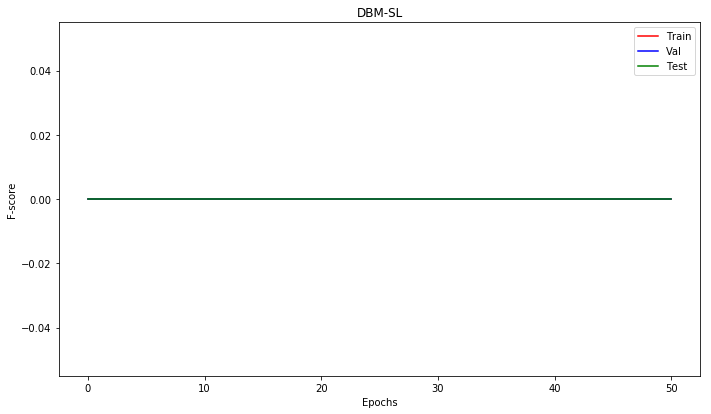

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=51=#==#==#==#==#=


100%|██████████| 17/17 [00:43<00:00,  1.47s/it]


==========Epoch No:51==========
Training Loss: 24.933084189891815
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




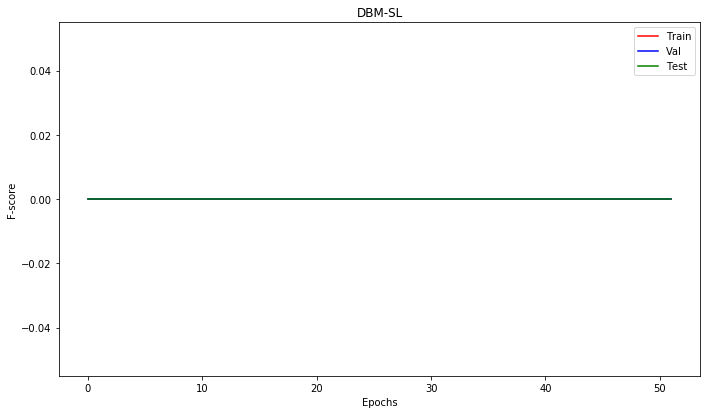

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=52=#==#==#==#==#=


100%|██████████| 17/17 [00:22<00:00,  1.34s/it]


==========Epoch No:52==========
Training Loss: 24.910558760166168
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




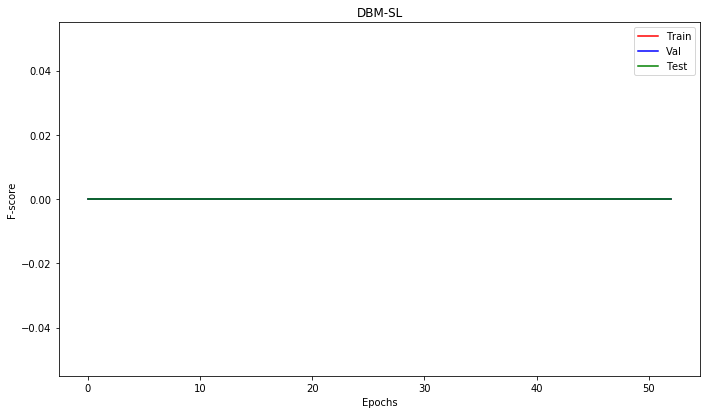

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=53=#==#==#==#==#=


100%|██████████| 17/17 [00:32<00:00,  1.59s/it]


==========Epoch No:53==========
Training Loss: 24.888479828834534
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




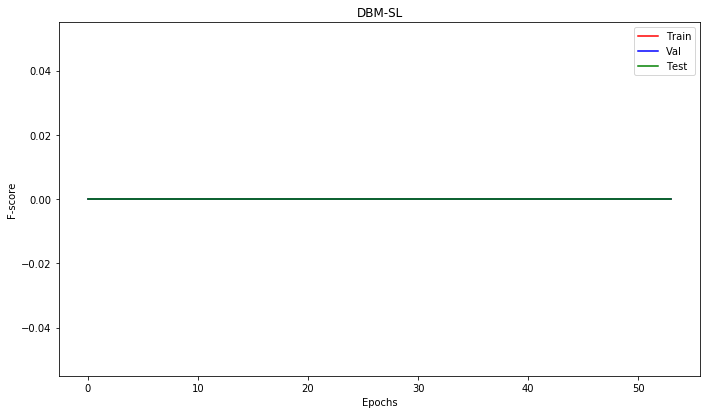

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=54=#==#==#==#==#=


100%|██████████| 17/17 [00:31<00:00,  1.36s/it]


==========Epoch No:54==========
Training Loss: 24.86589550971985
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




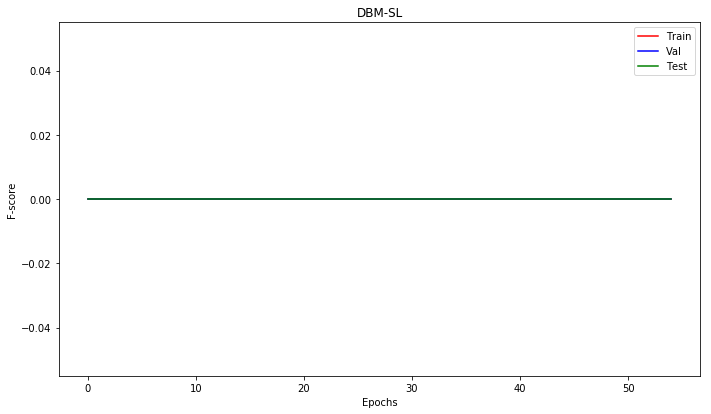

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=55=#==#==#==#==#=


100%|██████████| 17/17 [00:22<00:00,  1.36s/it]


==========Epoch No:55==========
Training Loss: 24.843783795833588
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




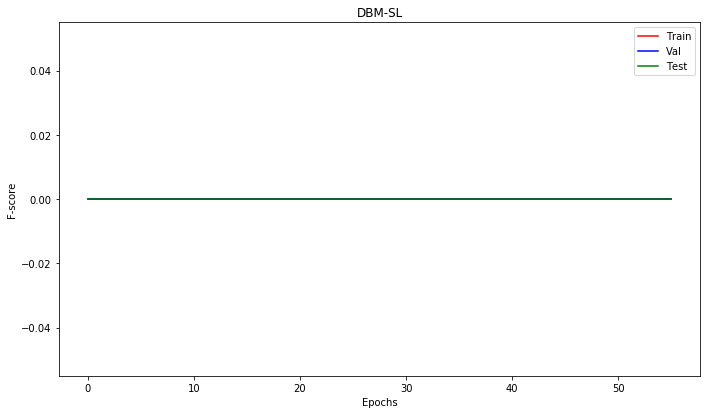

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=56=#==#==#==#==#=


100%|██████████| 17/17 [00:21<00:00,  1.15s/it]


==========Epoch No:56==========
Training Loss: 24.82096230983734
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




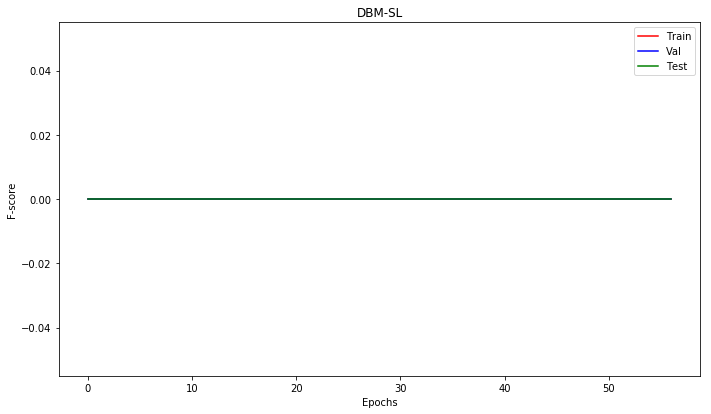

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=57=#==#==#==#==#=


100%|██████████| 17/17 [00:20<00:00,  1.15s/it]


==========Epoch No:57==========
Training Loss: 24.79837316274643
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




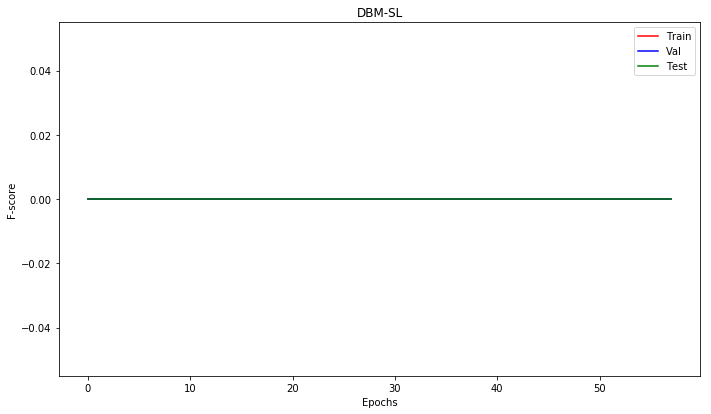

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=58=#==#==#==#==#=


100%|██████████| 17/17 [00:19<00:00,  1.16s/it]


==========Epoch No:58==========
Training Loss: 24.77530837059021
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




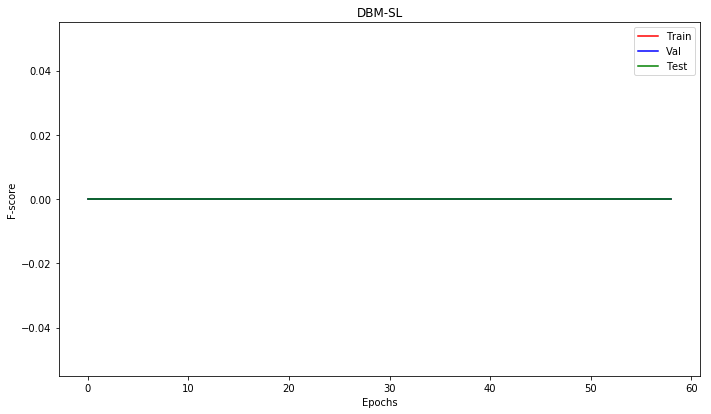

  0%|          | 0/17 [00:00<?, ?it/s]

=#==#==#==#==#=59=#==#==#==#==#=


100%|██████████| 17/17 [00:19<00:00,  1.17s/it]


==========Epoch No:59==========
Training Loss: 24.753258764743805
Train: (0.1695501730103806, 0.4117647058823529, 0.24019607843137258, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      3.0  6.0
--------
Val: (0.16, 0.4, 0.2285714285714286, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      0.0  1.0
--------
Test: (0.47619047619047616, 0.5714285714285714, 0.5194805194805194, None)
             0    1
Precision  0.0  0.0
Recall     0.0  0.0
F-score    0.0  0.0
Count      1.0  0.0




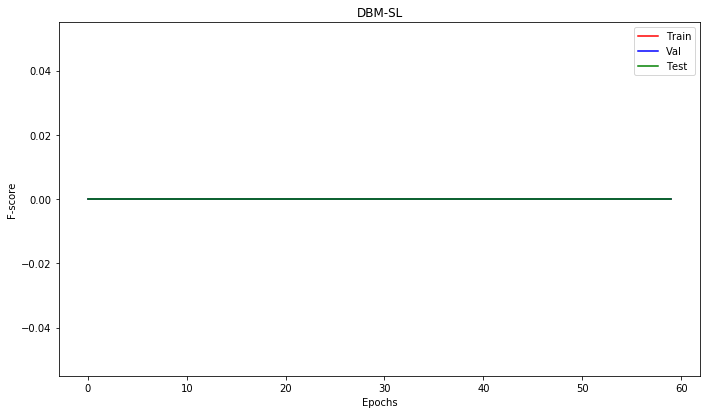

In [9]:
start_epoch = 0
end_epoch = 60
model_name = params['model_name']
for iter_ in range(start_epoch, end_epoch):
    print("=#="*5+str(iter_)+"=#="*5)
    total_loss = 0
    preds_train = []
    actual_train = []
    for each_ID in tqdm(data['train_ids']):
        model_RNN.zero_grad()

        tag_scores = model_RNN(data['data'], each_ID)

        _, ind_ = torch.max(tag_scores, dim=1)
        preds_train+=ind_.tolist()
        # For this dataset the label is in -2

        curr_labels = [data['data'][each_ID][label_ind]]
#         curr_labels = [batchify.label_mapping[x] for x in curr_labels]

        actual_train += curr_labels
#         curr_labels = torch.cuda.LongTensor(curr_labels)
        curr_labels = torch.LongTensor(curr_labels)
        curr_labels = autograd.Variable(curr_labels)
#         print(tag_scores)
#         print(curr_labels)
        loss = loss_function(tag_scores, curr_labels.reshape(tag_scores.shape[0]))
        total_loss+=loss.item()

        loss.backward()
        optimizer.step()
    
    df_tr = pd.DataFrame(list(precision_recall_fscore_support(actual_train, preds_train, 
                                                              labels = [0,1])),
                                                             columns = [0,1])
    df_tr.index = ['Precision','Recall','F-score','Count']
    prf_tr = precision_recall_fscore_support(actual_train, preds_train, average='weighted')
#     prf_tr, df_tr = evaluate_(model_RNN, data, 'train_ids')
    prf_test, df_test = eval_plot.evaluate_dbm(model_RNN, data, 'test_ids')
    prf_val, df_val = eval_plot.evaluate_dbm(model_RNN, data, 'val_ids')
    
    df_all = pd.concat([df_tr, df_val, df_test],axis=1)
    dict_df_prf_mod['Epoch'+str(iter_)] = df_all
    
    print('=='*5 + "Epoch No:"+str(iter_) +"=="*5)
    print("Training Loss: "+str(total_loss))
    print("=="*4)
    print("Train: " + str(prf_tr))
    print(df_tr)
    print("--"*4)
    print("Val: " + str(prf_val))
    print(df_val)
    print("--"*4)
    print("Test: " + str(prf_test))
    print(df_test)
    print('=='*40)
    print('\n')
    eval_plot.plot_graphs(dict_df_prf_mod, 'F-score', 
                      model_path + "/" +model_name+str(iter_)+'.png',
                      0, iter_+1, 
                      model_name)
#     if(save_flag):
#         torch.save(model_RNN, model_config_path + '/'+model_name+str(iter_)+'.pt')
#         pickle.dump(dict_df_prf_mod, open('../../Results/dict_prf_'+model_name+str(iter_)+'.pkl','wb'))
#         eval_plot.plot_graphs(dict_df_prf_mod, 'F-score', 
#                               '../../Plots/'+model_name+str(iter_)+'.png',
#                               0, iter_+1, 
#                               model_name)